In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from numpy import trapz

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/Area Under the Curve'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

48

In [201]:
# COMPUTE ARE UNDER THE CURVE PRE & POST STIMULUS
session_names = []
auc_means = []
auc_delta = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    pre_auc = pd.DataFrame(columns = cell_ids[:-1])
    post_auc = pd.DataFrame(columns = cell_ids[:-1])
    trials = cells['identifier'].unique()
        
    for t, trial in enumerate(trials):
        data = cells[cells['identifier']==trial]
        preS = data[:10]
        postS = data[10:]
            
        pre = []
        post = []
        for cid in cell_ids[:-1]:
            pre_trace = np.array(preS[cid])
            pre_trace_auc= trapz(pre_trace)
            pre.append(pre_trace_auc)
            post_trace = np.array(postS[cid])
            post_trace_auc= trapz(post_trace)
            post.append(post_trace_auc)
           
        pre_auc.loc[t] = pre
        post_auc.loc[t] = post
    
    pre_auc['trial_mean'] = pre_auc.mean(axis=1)
    pre_auc['identifier'] = trials
    pre_auc.to_csv(os.path.join(output_path, 'auc_pre'+ses_name+'.csv'))
    
    post_auc['trial_mean'] = post_auc.mean(axis=1)
    post_auc['identifier'] = trials
    post_auc.to_csv(os.path.join(output_path, 'auc_post'+ses_name+'.csv'))
    
    for s in stimuli:
        pre_mean = pre_auc[pre_auc['identifier'].str.contains(s)]['trial_mean'].mean()
        auc_means.append([ses_name, s, 'pre', pre_mean])
        post_mean = post_auc[pre_auc['identifier'].str.contains(s)]['trial_mean'].mean()
        auc_means.append([ses_name, s, 'post', post_mean])
        auc_diff = post_mean - pre_mean
        auc_delta.append([ses_name, s, auc_diff])
        
    ses_pre_mean = pre_auc['trial_mean'].mean(axis=0)
    auc_means.append([ses_name, 'session mean', 'pre', ses_pre_mean])
    ses_post_mean = post_auc['trial_mean'].mean(axis=0)
    auc_means.append([ses_name, 'session mean', 'post', ses_post_mean])
        
cols = ['session', 'modality', 'pre/post', 'mean auc']
auc_metrics = pd.DataFrame(auc_means, columns=cols)
auc_metrics.to_csv(os.path.join(output_path, 'auc metrics pre_post.csv'))

cols = ['session', 'modality', 'auc pre/post diff']
auc_delta = pd.DataFrame(auc_delta, columns=cols)
auc_delta.to_csv(os.path.join(output_path, 'auc delta pre_post.csv'))


processing:  dF_F0_SHORT_2P06_Ses01.csv
processing:  dF_F0_SHORT_2P06_Ses02.csv
processing:  dF_F0_SHORT_2P06_Ses03.csv
processing:  dF_F0_SHORT_2P05_Ses04.csv
processing:  dF_F0_SHORT_2P06_Ses04.csv
processing:  dF_F0_SHORT_2P06_Ses05.csv
processing:  dF_F0_SHORT_2P05_Ses06.csv
processing:  dF_F0_SHORT_2P06_Ses06.csv
processing:  dF_F0_SHORT_2P05_Ses07.csv
processing:  dF_F0_SHORT_2P06_Ses07.csv
processing:  dF_F0_SHORT_2P07_Ses01.csv
processing:  dF_F0_SHORT_2P08_Ses01.csv
processing:  dF_F0_SHORT_2P07_Ses03.csv
processing:  dF_F0_SHORT_2P08_Ses02.csv
processing:  dF_F0_SHORT_2P07_Ses04.csv
processing:  dF_F0_SHORT_2P07_Ses05.csv
processing:  dF_F0_SHORT_2P08_Ses04.csv
processing:  dF_F0_SHORT_2P07_Ses06.csv
processing:  dF_F0_SHORT_2P08_Ses05.csv
processing:  dF_F0_SHORT_2P07_Ses07.csv
processing:  dF_F0_SHORT_2P08_Ses06.csv
processing:  dF_F0_SHORT_2P07_CFA.csv
processing:  dF_F0_SHORT_2P09_Ses01.csv
processing:  dF_F0_SHORT_2P08_CFA.csv
processing:  dF_F0_SHORT_2P11_Ses01.csv
proc

In [246]:
# COMPUTE ARE UNDER THE CURVE FOR 'NO STIMULATION' WHOLE TRIAL
session_names = []
no_stim_means = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    no_stim_auc = pd.DataFrame(columns = cell_ids[:-1])
    no_stim_trials = list(cells[cells['identifier'].str.contains('no stim')]['identifier'].unique())
        
    for t, trial in enumerate(no_stim_trials):
        data = cells[cells['identifier']==trial]
            
        auc = []
        for cid in cell_ids[:-1]:
            trace = np.array(data[cid])
            trace_auc= trapz(trace)
            auc.append(trace_auc)
           
        no_stim_auc.loc[t] = auc
       
    no_stim_auc['trial_mean'] = no_stim_auc.mean(axis=1)
    no_stim_auc['identifier'] = no_stim_trials
    no_stim_auc.to_csv(os.path.join(output_path, 'no_stim_auc'+ses_name+'.csv'))

    no_stim_mean = no_stim_auc['trial_mean'].mean(axis=0)
    no_stim_means.append([ses_name, no_stim_mean])
        
cols = ['session', 'no stim auc']
auc_noStim = pd.DataFrame(no_stim_means, columns=cols)
auc_noStim.to_csv(os.path.join(output_path, 'auc no stim.csv'))

auc_noStim.head()

processing:  dF_F0_SHORT_2P06_Ses01.csv
processing:  dF_F0_SHORT_2P06_Ses02.csv
processing:  dF_F0_SHORT_2P06_Ses03.csv
processing:  dF_F0_SHORT_2P05_Ses04.csv
processing:  dF_F0_SHORT_2P06_Ses04.csv
processing:  dF_F0_SHORT_2P06_Ses05.csv
processing:  dF_F0_SHORT_2P05_Ses06.csv
processing:  dF_F0_SHORT_2P06_Ses06.csv
processing:  dF_F0_SHORT_2P05_Ses07.csv
processing:  dF_F0_SHORT_2P06_Ses07.csv
processing:  dF_F0_SHORT_2P07_Ses01.csv
processing:  dF_F0_SHORT_2P08_Ses01.csv
processing:  dF_F0_SHORT_2P07_Ses03.csv
processing:  dF_F0_SHORT_2P08_Ses02.csv
processing:  dF_F0_SHORT_2P07_Ses04.csv
processing:  dF_F0_SHORT_2P07_Ses05.csv
processing:  dF_F0_SHORT_2P08_Ses04.csv
processing:  dF_F0_SHORT_2P07_Ses06.csv
processing:  dF_F0_SHORT_2P08_Ses05.csv
processing:  dF_F0_SHORT_2P07_Ses07.csv
processing:  dF_F0_SHORT_2P08_Ses06.csv
processing:  dF_F0_SHORT_2P07_CFA.csv
processing:  dF_F0_SHORT_2P09_Ses01.csv
processing:  dF_F0_SHORT_2P08_CFA.csv
processing:  dF_F0_SHORT_2P11_Ses01.csv
proc

,session,no stim auc
0,2P06_Ses01,0.218602
1,2P06_Ses02,0.252810
2,2P06_Ses03,0.275957
3,2P05_Ses04,0.154599
4,2P06_Ses04,0.248252


No handles with labels found to put in legend.


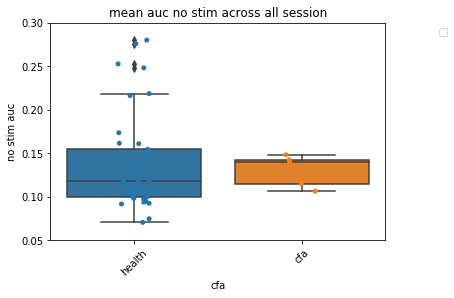

No handles with labels found to put in legend.


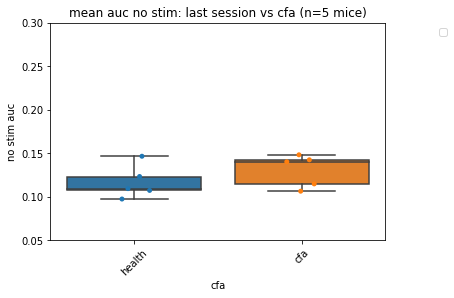

No handles with labels found to put in legend.


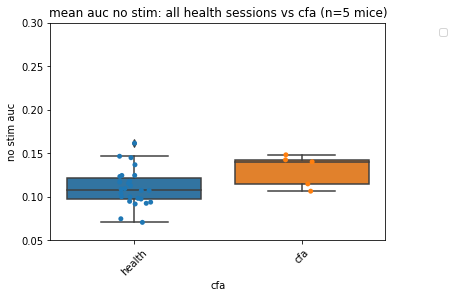

In [8]:
# COMPARE NO STIM AUC BETWEEN HEALTH AND CFA
auc_noStim = pd.read_csv(os.path.join(output_path, 'auc no stim.csv'))
auc_noStim['mouse'] = auc_noStim['session'].apply(lambda x: x[:4])
auc_noStim['cfa'] =auc_noStim['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')

ax = sns.stripplot(x='cfa', y="no stim auc", data=auc_noStim)
ax = sns.boxplot(x='cfa', y="no stim auc", data=auc_noStim)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.05, 0.3)
plt.title('mean auc no stim across all session')
plt.savefig(os.path.join(output_path, 'mean auc no stim all sessions health vs cfa.png'), bbox_inches='tight')
plt.show()

last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
df = auc_noStim[auc_noStim['session'].str.contains('CFA')|auc_noStim['session'].isin(last_session)]

ax = sns.stripplot(x='cfa', y="no stim auc", data=df)
ax = sns.boxplot(x='cfa', y="no stim auc", data=df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.05, 0.3)
plt.title('mean auc no stim: last session vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc no stim last session vs cfa.png'), bbox_inches='tight')
plt.show()

cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
df_5 = auc_noStim[auc_noStim['mouse'].isin(cfa_mice)]

ax = sns.stripplot(x='cfa', y="no stim auc", data=df_5)
ax = sns.boxplot(x='cfa', y="no stim auc", data=df_5)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.05, 0.3)
plt.title('mean auc no stim: all health sessions vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc no stim all session vs cfa_nis5.png'), bbox_inches='tight')
plt.show()

In [106]:
health = auc_metrics.loc[auc_metrics['session'].str.contains('Ses')]
cfa = auc_metrics.loc[auc_metrics['session'].str.contains('CFA')]
health.head()

,session,modality,pre/post,mean auc
0,2P06_Ses01,warm,pre,0.102575
1,2P06_Ses01,warm,post,0.092773
2,2P06_Ses01,hot,pre,0.090654
3,2P06_Ses01,hot,post,0.087067
4,2P06_Ses01,opto,pre,0.091756


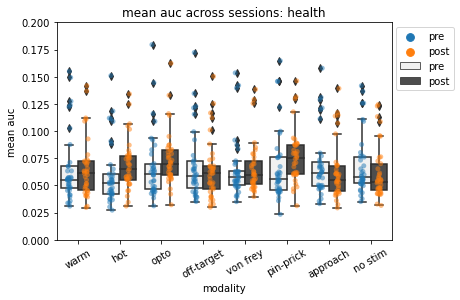

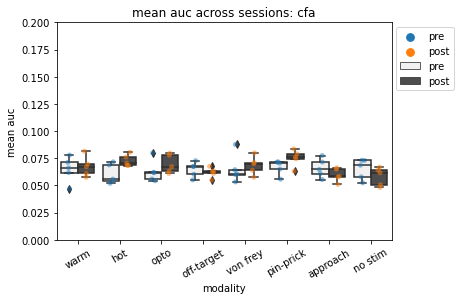

In [83]:
# PLOT BASELINE VS STIMULATION EPOCH FOR ALL MICE, ALL SESSIONS
ax = sns.stripplot(x="modality", y="mean auc", hue="pre/post", data=health, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue="pre/post", data=health, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,0.2)
ax.set(title='mean auc across sessions: health')
plt.savefig(os.path.join(output_path, 'mean auc by session health.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean auc", hue="pre/post", data=cfa, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue="pre/post", data=cfa, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,0.2)
ax.set(title='mean auc across sessions: cfa')
plt.savefig(os.path.join(output_path, 'mean auc by session cfa.png'), bbox_inches='tight')
plt.show()

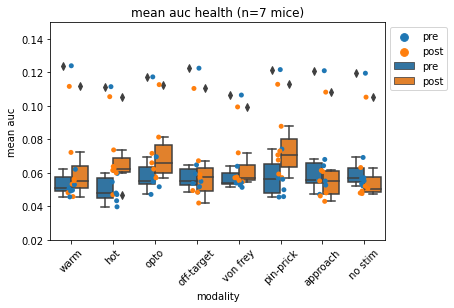

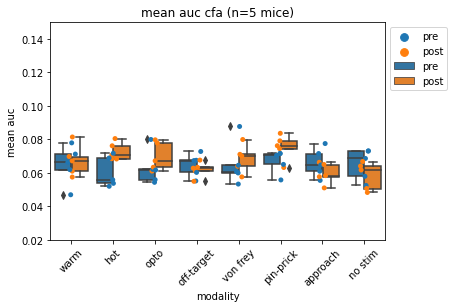

In [107]:
# COMPUTE SESSION AVERAGES FOR EACH MOUSE & AND RUN FRIEDMANS TEST FOR MAIN EFFECTS OF MODALITY AND EPOCH
stats_health = []
cols = ['mouse', 'modality', 'pre/post', 'mean auc']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        pre = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='pre')]
        post = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='post')]
        auc_pre = pre['mean auc'].mean()
        stats = [m, s, 'pre', auc_pre]
        stats_health.append(stats)
        auc_post = post['mean auc'].mean()
        stats = [m, s, 'post', auc_post]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='pre/post', data=stats_health)
ax = sns.boxplot(x='modality', y='mean auc', hue='pre/post', data=stats_health)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.15)
plt.title('mean auc health (n=7 mice)')
plt.savefig(os.path.join(output_path, 'mean auc health by mouse.png'), bbox_inches='tight')
plt.show()


stats_cfa = []
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = cfa[cfa['session'].str.contains(m)]
    for s in stimuli:
        pre = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='pre')]
        post = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='post')]
        auc_pre = pre['mean auc'].mean()
        stats = [m, s, 'pre', auc_pre]
        stats_cfa.append(stats)
        auc_post = post['mean auc'].mean()
        stats = [m, s, 'post', auc_post]
        stats_cfa.append(stats)
    
stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='pre/post', data=stats_cfa)
ax = sns.boxplot(x='modality', y='mean auc', hue='pre/post', data=stats_cfa)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.15)
plt.title('mean auc cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc cfa by mouse.png'), bbox_inches='tight')
plt.show()



In [108]:
import pingouin as pg

pg.friedman(data=stats_health, dv="mean auc", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.315841,7,15.47619,0.030357


In [109]:
pg.friedman(data=stats_health, dv="mean auc", within="pre/post", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,pre/post,0.183673,1,1.285714,0.256839


In [96]:
import scikit_posthocs as sp

sp.posthoc_conover_friedman(a=stats_health[stats_health['pre/post']=='post'], y_col="mean auc", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.322514,0.111961,0.917795,0.917795,0.051781,0.473842,0.322514
hot,0.322514,1.000000,0.573822,0.306930,0.323715,0.323715,0.085459,0.046472
opto,0.111961,0.573822,1.000000,0.097638,0.128607,0.707425,0.030740,0.012872
off-target,0.917795,0.306930,0.097638,1.000000,0.900836,0.046472,0.522903,0.323715
von frey,0.917795,0.323715,0.128607,0.900836,1.000000,0.058566,0.427069,0.306930
pin-prick,0.051781,0.323715,0.707425,0.046472,0.058566,1.000000,0.012872,0.008311
approach,0.473842,0.085459,0.030740,0.522903,0.427069,0.012872,1.000000,0.761609
no stim,0.322514,0.046472,0.012872,0.323715,0.306930,0.008311,0.761609,1.000000


In [110]:
sp.posthoc_conover_friedman(a=stats_health[stats_health['pre/post']=='pre'], y_col="mean auc", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.657029,0.606311,0.516023,0.865464,0.559144,0.516023,0.395741
hot,0.657029,1.000000,0.195276,0.192282,0.516023,0.192282,0.192282,0.192282
opto,0.606311,0.195276,1.000000,0.951787,0.776347,0.951787,0.951787,0.834784
off-target,0.516023,0.192282,0.951787,1.000000,0.663378,0.951787,1.000000,0.865464
von frey,0.865464,0.516023,0.776347,0.663378,1.000000,0.718992,0.663378,0.516023
pin-prick,0.559144,0.192282,0.951787,0.951787,0.718992,1.000000,0.951787,0.865464
approach,0.516023,0.192282,0.951787,1.000000,0.663378,0.951787,1.000000,0.865464
no stim,0.395741,0.192282,0.834784,0.865464,0.516023,0.865464,0.865464,1.000000


In [111]:
pg.friedman(data=stats_cfa, dv="mean auc", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.140952,7,4.933333,0.668099


In [112]:
pg.friedman(data=stats_cfa, dv="mean auc", within="pre/post", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,pre/post,0.04,1,0.2,0.654721


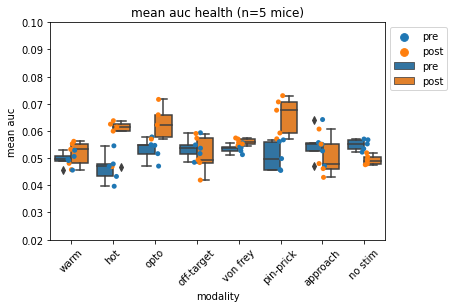

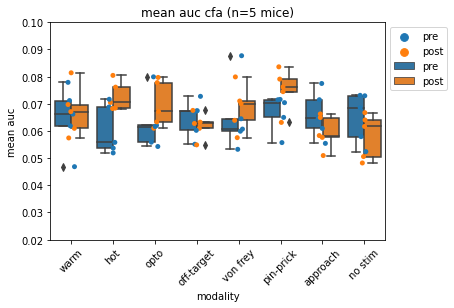

In [88]:
# COMPUTE SESSION AVERAGES FOR CFA MICE ONLY AND FOLLOW UP WITH FRIEDMANS
stats_health = []
cols = ['mouse', 'modality', 'pre/post', 'mean auc']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        pre = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='pre')]
        post = by_mouse[(by_mouse['modality']==s)&(by_mouse['pre/post']=='post')]
        auc_pre = pre['mean auc'].mean()
        stats = [m, s, 'pre', auc_pre]
        stats_health.append(stats)
        auc_post = post['mean auc'].mean()
        stats = [m, s, 'post', auc_post]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='pre/post', data=stats_health)
ax = sns.boxplot(x='modality', y='mean auc', hue='pre/post', data=stats_health)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.1)
plt.title('mean auc health (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc health by mouse (n=5).png'), bbox_inches='tight')
plt.show()

stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='mean auc', hue='pre/post', data=stats_cfa)
ax = sns.boxplot(x='modality', y='mean auc', hue='pre/post', data=stats_cfa)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.1)
plt.title('mean auc cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc cfa by mouse for comparison.png'), bbox_inches='tight')
plt.show()

In [122]:
auc_delta['mouse'] = auc_delta['session'].apply(lambda x: x[:4])
auc_delta['cfa'] = auc_delta['session'].apply(lambda x: 'yes' if 'CFA' in x else 'no')

health = auc_delta.loc[auc_delta['session'].str.contains('Ses')]
cfa = auc_delta.loc[auc_delta['session'].str.contains('CFA')]

cfa.head()

,session,modality,auc pre/post diff,mouse,cfa
168,2P07_CFA,warm,-0.005237,2P07,yes
169,2P07_CFA,hot,0.014682,2P07,yes
170,2P07_CFA,opto,-0.000208,2P07,yes
171,2P07_CFA,off-target,-0.006342,2P07,yes
172,2P07_CFA,von frey,-0.007791,2P07,yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


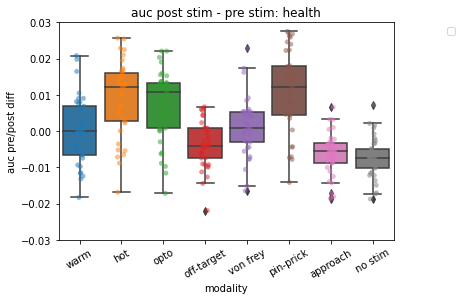

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


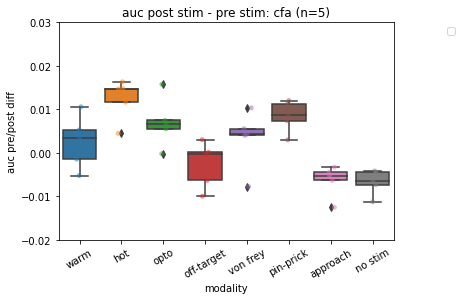

,session,modality,auc pre/post diff,mouse,cfa
168,2P07_CFA,warm,-0.005237,2P07,yes
169,2P07_CFA,hot,0.014682,2P07,yes
170,2P07_CFA,opto,-0.000208,2P07,yes
171,2P07_CFA,off-target,-0.006342,2P07,yes
172,2P07_CFA,von frey,-0.007791,2P07,yes


In [144]:
# PLOT DELTA STIMULATION EPOCH - BASELINE AUC AND COMPUTE FRIEDMANS FOR MAIN EFFECT OF MODALITY
ax = sns.stripplot(x="modality", y="auc pre/post diff", data=health, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="auc pre/post diff", data=health)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.03,0.03)
ax.set(title='auc post stim - pre stim: health')
plt.savefig(os.path.join(output_path, 'auc pre_post diff health.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="auc pre/post diff", data=cfa, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="auc pre/post diff", data=cfa)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.02,0.03)
ax.set(title='auc post stim - pre stim: cfa (n=5)')
plt.savefig(os.path.join(output_path, 'auc pre_post diff cfa.png'), bbox_inches='tight')
plt.show()

cfa.head()

In [138]:
pg.friedman(data=cfa, dv="auc pre/post diff", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.731429,7,25.6,0.000594


In [139]:
sp.posthoc_conover_friedman(a=cfa, y_col="auc pre/post diff", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.181922,0.345289,0.460047,0.938822,0.345289,0.353633,0.353633
hot,0.181922,1.000000,0.772785,0.070146,0.209999,0.703989,0.058091,0.058091
opto,0.345289,0.772785,1.000000,0.081293,0.345289,0.938822,0.070662,0.070662
off-target,0.460047,0.070146,0.081293,1.000000,0.404770,0.094416,0.909425,0.909425
von frey,0.938822,0.209999,0.345289,0.404770,1.000000,0.353633,0.345289,0.345289
pin-prick,0.345289,0.703989,0.938822,0.094416,0.353633,1.000000,0.070662,0.070662
approach,0.353633,0.058091,0.070662,0.909425,0.345289,0.070662,1.000000,1.000000
no stim,0.353633,0.058091,0.070662,0.909425,0.345289,0.070662,1.000000,1.000000


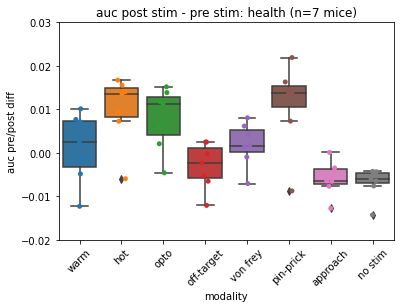

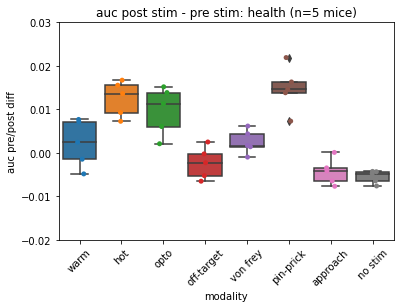

In [133]:
# COMPUTE SESSION AVERAGES OF DELTA AUC FOR ALL MICE OR CFA MICE ONLY AND FOLLOW UP WITH FRIEDMANS
stats_health_long = []
cols = ['mouse', 'modality','auc pre/post diff']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        auc_s = by_mouse[(by_mouse['modality']==s)]['auc pre/post diff'].mean()
        stats = [m, s, auc_s]
        stats_health_long.append(stats)

    
stats_health_long = pd.DataFrame(stats_health_long, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y="auc pre/post diff", data=stats_health_long)
ax = sns.boxplot(x='modality', y="auc pre/post diff", data=stats_health_long)
plt.xticks(rotation=45)
#ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(-0.02, 0.03)
plt.title('auc post stim - pre stim: health (n=7 mice)')
plt.savefig(os.path.join(output_path, 'auc pre_post diff health by mouse long.png'), bbox_inches='tight')
plt.show()


stats_health_short = []
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        auc_s = by_mouse[(by_mouse['modality']==s)]['auc pre/post diff'].mean()
        stats = [m, s, auc_s]
        stats_health_short.append(stats)

    
stats_health_short = pd.DataFrame(stats_health_short, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y="auc pre/post diff", data=stats_health_short)
ax = sns.boxplot(x='modality', y="auc pre/post diff", data=stats_health_short)
plt.xticks(rotation=45)
#ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(-0.02, 0.03)
plt.title('auc post stim - pre stim: health (n=5 mice)')
plt.savefig(os.path.join(output_path, 'auc pre_post diff health by mouse short.png'), bbox_inches='tight')
plt.show()





In [141]:
pg.friedman(data=stats_health_long, dv="auc pre/post diff", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.805637,7,39.47619,0.000002


In [143]:
sp.posthoc_conover_friedman(a=stats_health_long, y_col="auc pre/post diff", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.118714,0.197323,0.406732,0.867472,0.111961,0.197323,0.118714
hot,0.118714,1.000000,0.732316,0.015370,0.148403,0.917795,0.005721,0.004155
opto,0.197323,0.732316,1.000000,0.040274,0.271591,0.707425,0.013238,0.005721
off-target,0.406732,0.015370,0.040274,1.000000,0.307529,0.013238,0.707425,0.452303
von frey,0.867472,0.148403,0.271591,0.307529,1.000000,0.137206,0.148403,0.097638
pin-prick,0.111961,0.917795,0.707425,0.013238,0.137206,1.000000,0.005721,0.004155
approach,0.197323,0.005721,0.013238,0.707425,0.148403,0.005721,1.000000,0.732316
no stim,0.118714,0.004155,0.005721,0.452303,0.097638,0.004155,0.732316,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


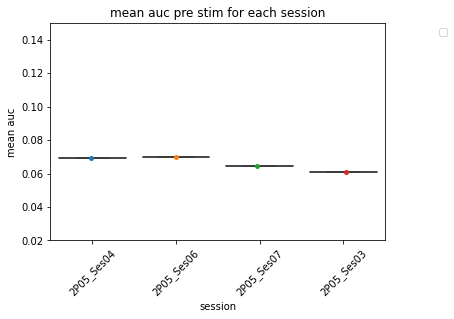

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


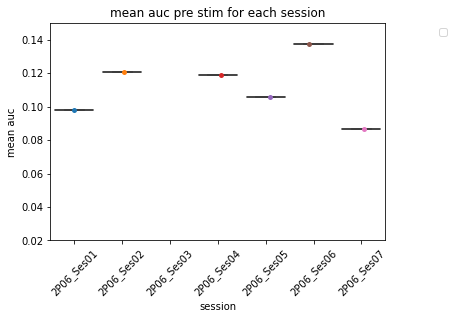

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


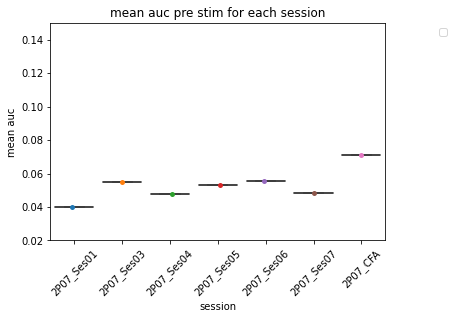

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


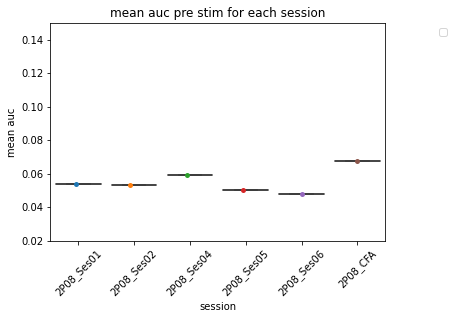

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


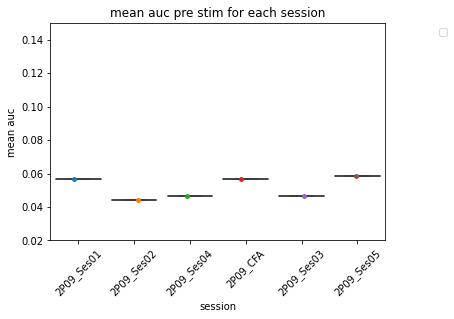

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


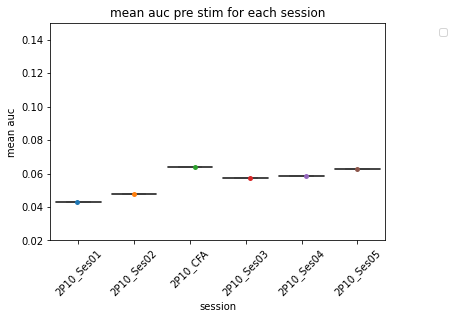

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


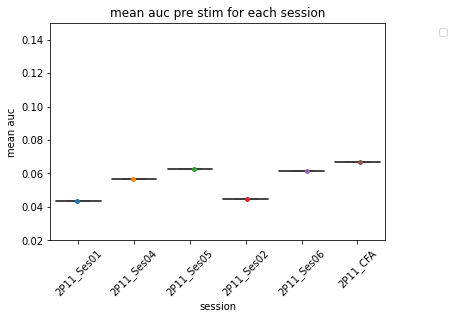

In [211]:
# INSPECT BASELINE AUC ACROSS SESSIONS
auc_metrics.tail()

mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']

for mouse in mice:
    df = auc_metrics[(auc_metrics['modality']=='session mean')&(auc_metrics['pre/post']=='pre')
                     &auc_metrics['session'].str.contains(mouse)]

    ax = sns.stripplot(x='session', y="mean auc", data=df)
    ax = sns.boxplot(x='session', y="mean auc", data=df)
    plt.xticks(rotation=45)
    ax.legend(bbox_to_anchor= (1.2,1))
    #ax.legend([],[], frameon=False)
    plt.ylim(0.02, 0.15)
    plt.title('mean auc pre stim for each session')
    #plt.savefig(os.path.join(output_path, 'mean auc post last session vs cfa.png'), bbox_inches='tight')
    plt.show()

mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
    
